In [1]:
# Import necessary modules
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm 
import matplotlib.pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap
import scipy

In [2]:
# Generate green-red-black color map
rbg_cmap = LinearSegmentedColormap.from_list('mycmap', ['green', 'black', 'red'])

norm of v: 5.000000000000001
norm of u: 7.0710678118654755
Product of the norms: 35.355339059327385


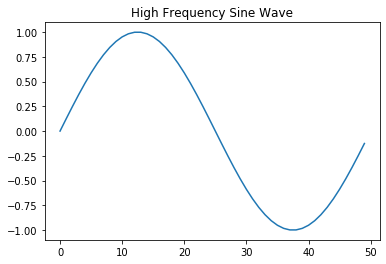

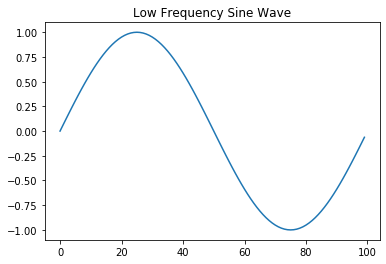

In [3]:
# Generate synthetic data consisting of a sine vectors of periods 50 and 100
period1 = 50
period2 = 100

t1 = np.array(range(0, period1))
t2 = np.array(range(0, period2))

v = np.sin((t1 / period1)*2*np.pi)
v_norm = np.linalg.norm(v)
print('norm of v: {}'.format(v_norm))
plt.figure()
plt.title('High Frequency Sine Wave')
plt.plot(t1, v);

u = np.sin((t2 / period2)*2*np.pi)
u_norm = np.linalg.norm(u)
print('norm of u: {}'.format(u_norm))
plt.figure()
plt.title('Low Frequency Sine Wave')
plt.plot(t2, u);

print('Product of the norms: {}'.format(u_norm*v_norm))

Outer Product Dimensions: (100, 50)


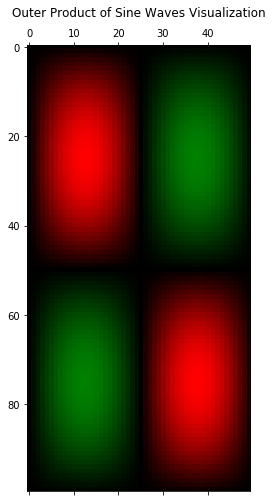

In [6]:
# Compute the outer product of the sine vectors and visualize the resulting matrix
uv_outer1 = np.outer(u, v)
print('Outer Product Dimensions: {}'.format(uv_outer1.shape))

plt.matshow(uv_outer1, cmap=rbg_cmap);
plt.title('Outer Product of Sine Waves Visualization');

norm of v: 4.999999999999999
norm of u: 7.0710678118654755
Product of the norms: 35.35533905932737


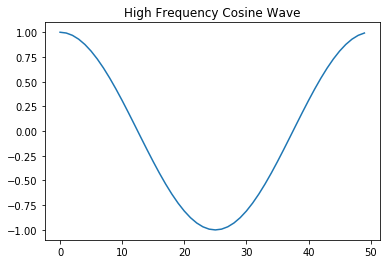

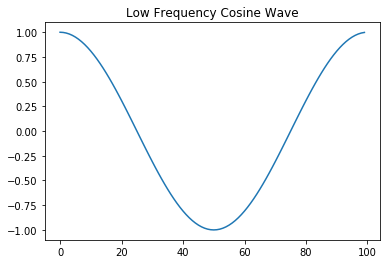

In [7]:
# Generate synthetic data consisting of a cosine vectors of periods 50 and 100
v = np.cos((t1 / period1)*2*np.pi)
v_norm = np.linalg.norm(v)
print('norm of v: {}'.format(v_norm))
plt.figure()
plt.title('High Frequency Cosine Wave')
plt.plot(t1, v);

u = np.cos((t2 / period2)*2*np.pi)
u_norm = np.linalg.norm(u)
print('norm of u: {}'.format(u_norm))
plt.figure()
plt.title('Low Frequency Cosine Wave')
plt.plot(t2, u);

print('Product of the norms: {}'.format(u_norm*v_norm))


Outer Product Dimensions: (100, 50)


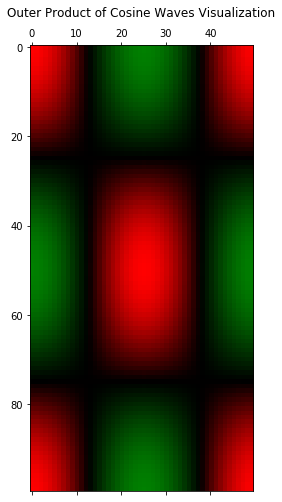

In [9]:
# Compute the outer product of the cosine vectors and visualize the resulting matrix
uv_outer2 = np.outer(u, v)
print('Outer Product Dimensions: {}'.format(uv_outer2.shape))

plt.matshow(uv_outer2, cmap=rbg_cmap)
plt.title('Outer Product of Cosine Waves Visualization');

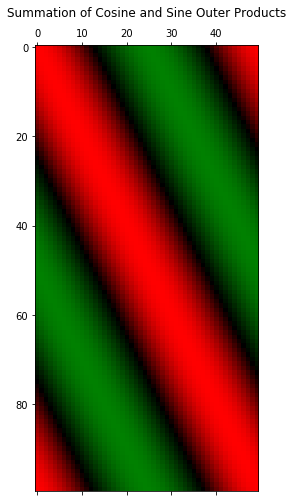

In [10]:
# Combine the sine and cosine outerproduct matrices and visualize the final matrix
data_matrix = uv_outer1 + uv_outer2

plt.matshow(data_matrix, cmap=rbg_cmap)
plt.title('Summation of Cosine and Sine Outer Products');

In [11]:
# Compute the SVD for the combined signal
u, sigma, v_t = np.linalg.svd(data_matrix, full_matrices=False, compute_uv=True)

In [15]:
print('Dimensions of the Matrix Factors:')
print('\tu shape: {}'.format(u.shape))
print('\tsigma shape: {}'.format(sigma.shape))
print('\tv_t shape: {}'.format(v_t.shape))

Dimensions of the Matrix Factors:
	u shape: (100, 50)
	sigma shape: (50,)
	v_t shape: (50, 50)


In [16]:
# Check that the columns of u are orthogonal
cols = u.shape[1]
dot_prods = []
for i in range(cols - 1):
    for j in range(i + 1, cols):
        prod = np.dot(u[:, i], u[:, j])
        if prod < 1e-10:
            prod = 0
        dot_prods.append(prod)

dot_prods = np.array(dot_prods)
num_cols_not_ortho = (dot_prods != 0).sum()
print('There are {} pairs of columns in u which are not orthogonal.'.format(num_cols_not_ortho))

There are 0 pairs of columns in u which are not orthogonal.


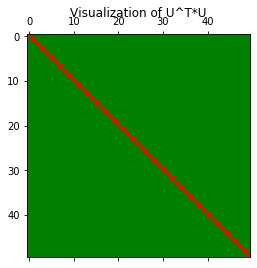

In [17]:
# Calculate U^T*U matrix and check that it is the identity
X = np.matmul(u.T, u)
plt.matshow(X, cmap=rbg_cmap)
plt.title('Visualization of U^T*U');

In [29]:
# Check that the columns of u are normalized (norm(u_*i) = 1 for all i)
cols = u.shape[1]
norms = []
for i in range(cols):
    norm = np.linalg.norm(u[:, i])
    if np.abs(norm - 1) < 1e-10:
        norm = 1
    norms.append(norm)

norms = np.array(norms)
num_cols_not_normed = (norms != 1).sum()
print('There are {} columns in u which are not normalized.'.format(num_cols_not_normed))

There are 0 columns in u which are not normalized.


In [20]:
# Check that the diagonals of sigma are in descending order
ordered_correctly = True
for i in range(sigma.shape[0] - 1):
    if sigma[i] < sigma[i + 1]:
        ordered_correctly = False
if ordered_correctly:
    print('The diagonals of sigma are in descending order.')
else:
    print('The diagonals of sigma are not ordered properly')

The diagonals of sigma are in descending order.


In [21]:
# Check that the singular values are all positive
num_neg = (sigma < 0).sum()
print('There are {} negative singular values.'.format(num_neg))

There are 0 negative singular values.


In [22]:
# Check that the rows of v_t are orthogonal
rows = v_t.shape[0]
dot_prods = []
for i in range(rows - 1):
    for j in range(i + 1, rows):
        prod = np.dot(v_t[i, :], v_t[j, :])
        if prod < 1e-10:
            prod = 0
        dot_prods.append(prod)

dot_prods = np.array(dot_prods)
num_rows_not_ortho = (dot_prods != 0).sum()
print('There are {} pairs of rows in v_t which are not orthogonal.'.format(num_rows_not_ortho))

There are 0 pairs of rows in v_t which are not orthogonal.


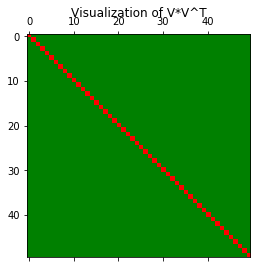

In [24]:
# Calculate V*V^T and check that it is the identity
X = np.matmul(v_t.T, v_t)
plt.matshow(X, cmap=rbg_cmap)
plt.title('Visualization of V*V^T');

In [30]:
# Check that the rows of V^T are normalized (norm(V^T_i*) = 1)
rows = v_t.shape[0]
norms = []
for i in range(rows):
    norm = np.linalg.norm(v_t[i, :])
    if np.abs(norm - 1) < 1e-10:
        norm = 1
    norms.append(norm)

norms = np.array(norms)
num_cols_not_normed = (norms != 1).sum()
print('There are {} rows in v_t which are not normalized.'.format(num_cols_not_normed))

There are 0 rows in v_t which are not normalized.


Norm of column 1: 0.9999999999999997
Norm of column 2: 0.9999999999999998


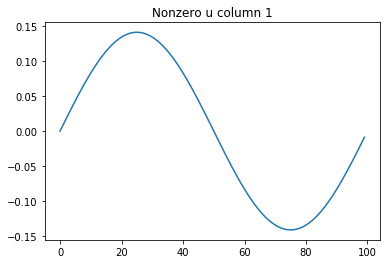

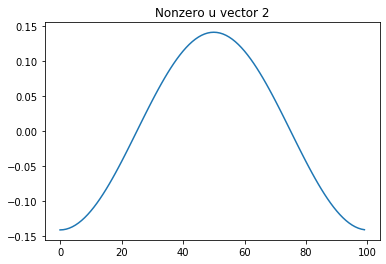

In [32]:
# Find the nonzero singular values and plot the corresponding columns of U
nonzero_cols = (sigma > 1e-10)
m = u[:, nonzero_cols]

plt.figure()
plt.title('Nonzero u column 1')
plt.plot(range(m.shape[0]), m[:, 0]);

plt.figure()
plt.title('Nonzero u vector 2')
plt.plot(range(m.shape[0]), m[:, 1]);

print('Norm of column 1: {}'.format(np.linalg.norm(m[:, 0])))
print('Norm of column 2: {}'.format(np.linalg.norm(m[:, 1])))

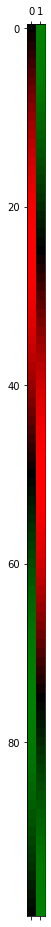

In [33]:
# Visualize the nonzero u columns
plt.matshow(m, cmap=rbg_cmap);

In [34]:
# Check that the first two diagonals are nearly equal
print('sigma(1, 1) / sigma(2, 2) = {}'.format(sigma[0] / sigma[1]))

sigma(1, 1) / sigma(2, 2) = 1.0000000000000007


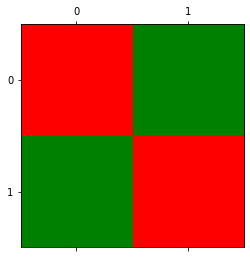

In [35]:
# Visualize the reduced sigma matrix consisting of only nonzero diagonals
sigma_full = np.diag(sigma)
sigma_full[sigma_full < 1e-10] = 0
sigma_full = sigma_full[:2, :2]
plt.matshow(sigma_full, cmap=rbg_cmap);

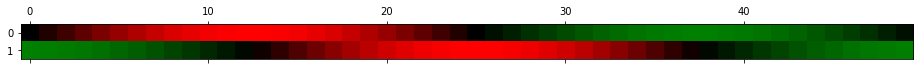

In [37]:
# Visualize the rows of V^T corresponding the nonzero singular values
plt.matshow(v_t.T[:, :2].T, cmap=rbg_cmap);

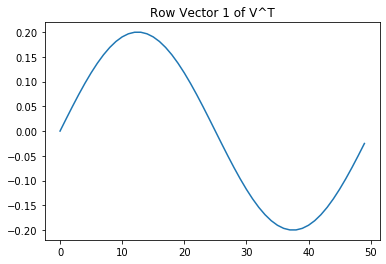

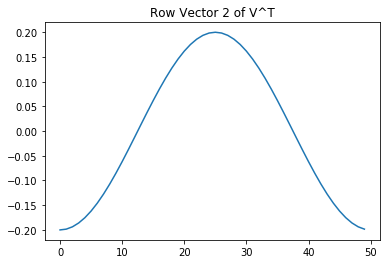

In [39]:
# Plot the row vectors of V^T corresponding to the nonzero singular values
plt.title('Row Vector 1 of V^T')
plt.plot(range(v_t.shape[0]), v_t[0, :]);

plt.figure()
plt.title('Row Vector 2 of V^T')
plt.plot(range(v_t.shape[0]), v_t[1, :]);

# Discussion  
The two columns of $U$ corresponding to nonzero singular values contained the high frequency sine and consine waves used to compute the outer products in the orginal data matrix.  The two rows of $V^{T}$ corresponding to the nonzero singular values consisted of the low frequency sine and cosine waves used in the original outer products.  Note that the cosine waves in both the $U$ and $V^T$ matricies have signs opposite to that of the original cosine waves.  This is due to the fact that the columns of $U$ and rows of $V^T$ are unique only up to a sign.